In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df1 =  pd.read_csv('application_data.csv.zip')
df2 =  pd.read_csv('previous_application.csv.zip')

In [4]:
df = pd.merge(df1,df2,on='SK_ID_CURR')

In [11]:
df['AMT_INCOME_TOTAL'].value_counts()

135000.0    162461
112500.0    136636
157500.0    128243
180000.0    119780
225000.0    101642
             ...  
190440.0         1
68886.0          1
67275.0          1
66330.0          1
131125.5         1
Name: AMT_INCOME_TOTAL, Length: 1876, dtype: int64

In [12]:
np.quantile(df['AMT_INCOME_TOTAL'],[0.25,0.5,0.75])

array([112500., 157500., 207000.])

In [15]:
df['incomeClass'] = 'Quant1'
df.loc[(df['AMT_INCOME_TOTAL'] > 112500) \
              & (df['AMT_INCOME_TOTAL'] < 157500), \
              'incomeClass'] = 'Quant2'
df.loc[(df['AMT_INCOME_TOTAL'] > 157500) \
              & (df['AMT_INCOME_TOTAL'] < 207000), \
              'incomeClass'] = 'Quant3'
df.loc[df['AMT_INCOME_TOTAL'] > 207000, \
             'incomeClass'] = 'Quant4'
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,incomeClass
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,Quant3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,Quant4
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0,Quant4
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0,Quant4
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0,Quant1


In [16]:
incomeTot = df.groupby(['incomeClass'])['TARGET']\
                     .agg(incomeTot='count').reset_index()
incomeTot

,incomeClass,incomeTot
0,Quant1,542883
1,Quant2,254812
2,Quant3,262955
3,Quant4,353051


In [17]:
incomeProp = df.groupby(['incomeClass', 'TARGET'])['TARGET']\
                      .agg(incomeCat='count').reset_index()
incomeProp

,incomeClass,TARGET,incomeCat
0,Quant1,0,494934
1,Quant1,1,47949
2,Quant2,0,231903
3,Quant2,1,22909
4,Quant3,0,239532
5,Quant3,1,23423
6,Quant4,0,324972
7,Quant4,1,28079


In [18]:
incomeComb = pd.merge(incomeProp, incomeTot, \
                       on = ['incomeClass'])
incomeComb['catProp'] = (incomeComb.incomeCat \
                          / incomeComb.incomeTot)*100
incomeComb

,incomeClass,TARGET,incomeCat,incomeTot,catProp
0,Quant1,0,494934,542883,91.167710
1,Quant1,1,47949,542883,8.832290
2,Quant2,0,231903,254812,91.009450
3,Quant2,1,22909,254812,8.990550
4,Quant3,0,239532,262955,91.092392
5,Quant3,1,23423,262955,8.907608
6,Quant4,0,324972,353051,92.046758
7,Quant4,1,28079,353051,7.953242


In [19]:
from sklearn import preprocessing

In [20]:
x = df[['AMT_INCOME_TOTAL']].values.astype(float)

In [21]:
minmaxScaler = preprocessing.MinMaxScaler()

In [22]:
df['incomeTran'] = minmaxScaler.fit_transform(x)

In [23]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,incomeClass,incomeTran
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,Quant3,0.001512
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,Quant4,0.002089
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0,Quant4,0.002089
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0,Quant4,0.002089
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0,Quant1,0.000358


In [24]:
df['incomeTran'] = df['incomeTran'] + 0.00001

In [116]:
# Let us transform values for FLAG_OWN_REALTY
df['realtyTran'] = 1
# Giving a weight of 5 if the client owns realty
df.loc[df['FLAG_OWN_REALTY'] == 'Y', 'realtyTran'] = 5
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NFLAG_INSURED_ON_APPROVAL,incomeClass,incomeTran,realtyTran,carTran,assetIndex,assetClass,AMT_DIFF,FLAG_CONTACT_INFO,asset_BINS
0,100002,1,Cash loans,M,N,Y,0,202500.0,4.066e+05,24700.5,...,0.0,Quant3,1.522e-03,5,1,0.008,Quant3,0.0,4,High
1,100003,0,Cash loans,F,N,N,0,270000.0,1.294e+06,35698.5,...,1.0,Quant4,2.099e-03,1,1,0.002,Quant1,NaN,4,Low
2,100003,0,Cash loans,F,N,N,0,270000.0,1.294e+06,35698.5,...,0.0,Quant4,2.099e-03,1,1,0.002,Quant1,-11137.5,4,Low
3,100003,0,Cash loans,F,N,N,0,270000.0,1.294e+06,35698.5,...,1.0,Quant4,2.099e-03,1,1,0.002,Quant1,-6129.0,4,Low
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,1.350e+05,6750.0,...,0.0,Quant1,3.678e-04,5,5,0.009,Quant3,-684.0,5,High


In [117]:
# Let us transform values for FLAG_OWN_CAR
df['carTran'] = 1
# Giving a weight of 5 if the person owns a car
df.loc[df['FLAG_OWN_CAR'] == 'Y', 'carTran'] = 5
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NFLAG_INSURED_ON_APPROVAL,incomeClass,incomeTran,realtyTran,carTran,assetIndex,assetClass,AMT_DIFF,FLAG_CONTACT_INFO,asset_BINS
0,100002,1,Cash loans,M,N,Y,0,202500.0,4.066e+05,24700.5,...,0.0,Quant3,1.522e-03,5,1,0.008,Quant3,0.0,4,High
1,100003,0,Cash loans,F,N,N,0,270000.0,1.294e+06,35698.5,...,1.0,Quant4,2.099e-03,1,1,0.002,Quant1,NaN,4,Low
2,100003,0,Cash loans,F,N,N,0,270000.0,1.294e+06,35698.5,...,0.0,Quant4,2.099e-03,1,1,0.002,Quant1,-11137.5,4,Low
3,100003,0,Cash loans,F,N,N,0,270000.0,1.294e+06,35698.5,...,1.0,Quant4,2.099e-03,1,1,0.002,Quant1,-6129.0,4,Low
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,1.350e+05,6750.0,...,0.0,Quant1,3.678e-04,5,5,0.009,Quant3,-684.0,5,High


In [29]:
df['assetIndex'] = df['incomeTran'] \
                         * df['realtyTran'] \
                         * df['carTran']
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,incomeClass,incomeTran,realtyTran,carTran,assetIndex
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-565.0,125.0,-25.0,-17.0,0.0,Quant3,0.001522,5,1,0.007609
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-716.0,-386.0,-536.0,-527.0,1.0,Quant4,0.002099,1,1,0.002099
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-797.0,-647.0,-647.0,-639.0,0.0,Quant4,0.002099,1,1,0.002099
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-2310.0,-1980.0,-1980.0,-1976.0,1.0,Quant4,0.002099,1,1,0.002099
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-784.0,-694.0,-724.0,-714.0,0.0,Quant1,0.000368,5,5,0.009194


In [30]:
np.quantile(df['assetIndex'],[0.25,0.5,0.75])

array([0.0028006 , 0.00568585, 0.01400302])

In [31]:
df['assetClass'] = 'Quant1'
df.loc[(df['assetIndex'] > 0.0028006) \
              & (df['assetIndex'] < 0.00568585), \
              'assetClass'] = 'Quant2'
df.loc[(df['assetIndex'] > 0.00568585) \
              & (df['assetIndex'] < 0.01400302), \
              'assetClass'] = 'Quant3'
df.loc[df['assetIndex'] > 0.01400302, \
             'assetClass'] = 'Quant4'
df.assetClass[df['assetIndex'] > 0.01400302] = 'Quant4'
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,incomeClass,incomeTran,realtyTran,carTran,assetIndex,assetClass
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,125.0,-25.0,-17.0,0.0,Quant3,0.001522,5,1,0.007609,Quant3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-386.0,-536.0,-527.0,1.0,Quant4,0.002099,1,1,0.002099,Quant1
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-647.0,-647.0,-639.0,0.0,Quant4,0.002099,1,1,0.002099,Quant1
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-1980.0,-1980.0,-1976.0,1.0,Quant4,0.002099,1,1,0.002099,Quant1
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-694.0,-724.0,-714.0,0.0,Quant1,0.000368,5,5,0.009194,Quant3


In [32]:
# Calculating total of each asset class
assetTot = df.groupby('assetClass')['TARGET']\
                   .agg(assetTot='count').reset_index()
# Calculating the category wise counts
assetProp = df.groupby(['assetClass', 'TARGET'])['TARGET']\
                    .agg(assetCat='count').reset_index()


In [33]:
# Merging both the data frames
assetComb = pd.merge(assetProp, assetTot, on = ['assetClass'])
assetComb['catProp'] = (assetComb.assetCat \
                        / assetComb.assetTot)*100
assetComb

,assetClass,TARGET,assetCat,assetTot,catProp
0,Quant1,0,302877,333301,90.871915
1,Quant1,1,30424,333301,9.128085
2,Quant2,0,299133,327921,91.221056
3,Quant2,1,28788,327921,8.778944
4,Quant3,0,374687,410070,91.371473
5,Quant3,1,35383,410070,8.628527
6,Quant4,0,314644,342409,91.891276
7,Quant4,1,27765,342409,8.108724


In [90]:
df7=df[['incomeTran','realtyTran','carTran','assetIndex','AMT_DIFF','FLAG_CONTACT_INFO','TARGET',]]

In [41]:
dfNumeric = df[['TARGET','AMT_INCOME_TOTAL','AMT_CREDIT_x']]

In [37]:
from pandas import set_option

In [38]:
set_option('display.width',150)
set_option('precision',3)
dfCorr = dfNumeric.corr(method = 'pearson')
dfCorr

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT_x
TARGET,1.000,-0.002,-0.024
AMT_INCOME_TOTAL,-0.002,1.000,0.166
AMT_CREDIT_x,-0.024,0.166,1.000


In [91]:
set_option('display.width',150)
set_option('precision',3)
dfCorr = df7.corr(method = 'pearson')
dfCorr

,incomeTran,realtyTran,carTran,assetIndex,AMT_DIFF,FLAG_CONTACT_INFO,TARGET
incomeTran,1.000,0.011,0.090,0.610,-0.015,0.034,-0.002
realtyTran,0.011,1.000,-0.005,0.275,0.005,-0.110,-0.007
carTran,0.090,-0.005,1.000,0.539,0.009,0.094,-0.015
assetIndex,0.610,0.275,0.539,1.000,-0.010,0.040,-0.012
AMT_DIFF,-0.015,0.005,0.009,-0.010,1.000,0.010,-0.015
FLAG_CONTACT_INFO,0.034,-0.110,0.094,0.040,0.010,1.000,0.024
TARGET,-0.002,-0.007,-0.015,-0.012,-0.015,0.024,1.000


In [72]:
df['AMT_DIFF']= df['AMT_APPLICATION']-df['AMT_CREDIT_y']-df['AMT_DOWN_PAYMENT']

In [115]:
df['FLAG_CONTACT_INFO']=df['FLAG_MOBIL']+df['FLAG_EMP_PHONE']+df['FLAG_WORK_PHONE']+df['FLAG_CONT_MOBILE']+df['FLAG_PHONE']+df['FLAG_EMAIL']

In [96]:
df['FLAG_CONTACT_INFO'].value_counts()

3    736591
4    312573
2    189220
5    163410
6     11778
1       129
Name: FLAG_CONTACT_INFO, dtype: int64

In [100]:
a = df.groupby(['FLAG_CONTACT_INFO','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1)
a['SK_ID_CURR'] = a_level1['SK_ID_CURR']/len(df1)*100
a = a.rename(columns={'SK_ID_CURR':'TotalCount'}).reset_index()
a

,FLAG_CONTACT_INFO,TotalCount,Defaulter_rates
0,1,0.042,6.202
1,2,61.533,5.910
2,3,239.533,9.096
3,4,101.646,8.954
4,5,53.140,9.149
5,6,3.830,10.426


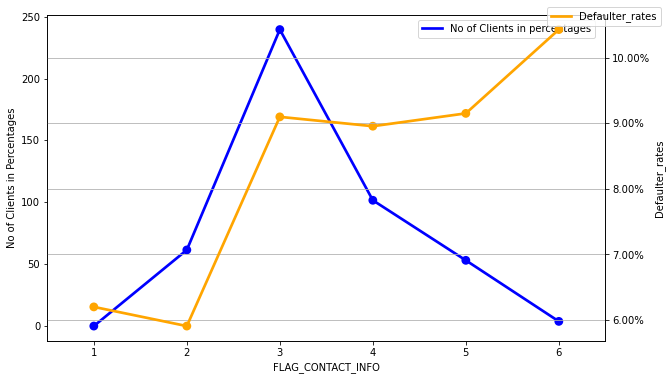

In [102]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(10,6))
#figsize=(10,5)


sns.pointplot(x='FLAG_CONTACT_INFO',y='TotalCount',data=a,ax=ax1,color='blue',legend=False)
# ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
ax1.set(ylabel='No of Clients in Percentages')
ax2 = ax1.twinx()


sns.pointplot(x='FLAG_CONTACT_INFO',y='Defaulter_rates',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.88715,0.95))
ax1.legend(labels=['No of Clients in percentages'],bbox_to_anchor=(0.99,1))
ax2.grid(None)

plt.show()

In [103]:
a = df.groupby(['AMT_DIFF','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1)
a['SK_ID_CURR'] = a_level1['SK_ID_CURR']/len(df1)*100
a = a.rename(columns={'SK_ID_CURR':'TotalCount'}).reset_index()
a

,AMT_DIFF,TotalCount,Defaulter_rates
0,-2.404e+05,3.252e-04,100.000
1,-1.960e+05,1.626e-03,20.000
2,-1.942e+05,3.252e-04,100.000
3,-1.891e+05,6.504e-04,50.000
4,-1.764e+05,9.756e-04,66.667
...,...,...,...
7257,1.397e-11,1.626e-03,20.000
7258,1.397e-11,1.041e-02,6.250
7259,1.455e-11,5.138e-02,1.899
7260,2.183e-11,6.504e-03,5.000


In [107]:
np.quantile(df['assetIndex'],[0.25,0.5,0.75])

array([0.0028006 , 0.00568585, 0.01400302])

In [110]:
ranges=[0,0.0028006 , 0.00568585, 0.01400302]
df['asset_BINS'] = pd.cut(df['assetIndex'],bins=ranges,precision=0, labels=['Low','Medium','High' ])

In [111]:
a = df.groupby(['asset_BINS','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1)
a['SK_ID_CURR'] = a_level1['SK_ID_CURR']/len(df1)*100
a = a.rename(columns={'SK_ID_CURR':'TotalCount'}).reset_index()
a

,asset_BINS,TotalCount,Defaulter_rates
0,Low,108.387,9.128
1,Medium,106.637,8.779
2,High,133.351,8.629


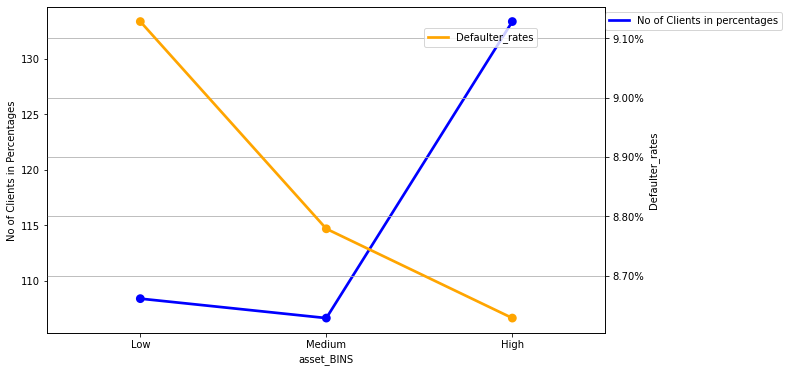

In [112]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(10,6))
#figsize=(10,5)


sns.pointplot(x='asset_BINS',y='TotalCount',data=a,ax=ax1,color='blue',legend=False)
# ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
ax1.set(ylabel='No of Clients in Percentages')
ax2 = ax1.twinx()


sns.pointplot(x='asset_BINS',y='Defaulter_rates',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.88715,0.95))
ax1.legend(labels=['No of Clients in percentages'],bbox_to_anchor=(0.99,1))
ax2.grid(None)

plt.show()

**ASSETCLASS VS DEFAULT RATES**

In [113]:
a = df.groupby(['assetClass','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1)
a['SK_ID_CURR'] = a_level1['SK_ID_CURR']/len(df1)*100
a = a.rename(columns={'SK_ID_CURR':'TotalCount'}).reset_index()
a

,assetClass,TotalCount,Defaulter_rates
0,Quant1,108.387,9.128
1,Quant2,106.637,8.779
2,Quant3,133.351,8.629
3,Quant4,111.349,8.109


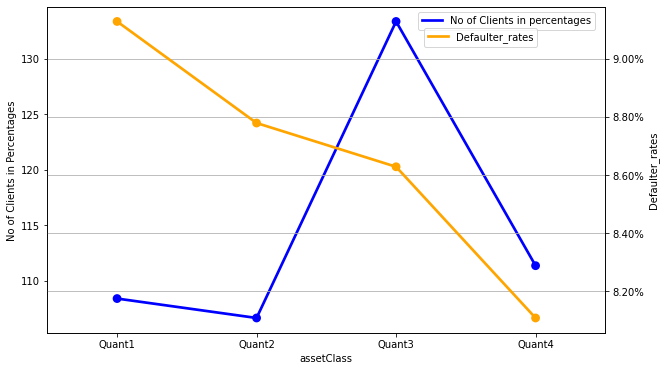

In [114]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(10,6))
#figsize=(10,5)


sns.pointplot(x='assetClass',y='TotalCount',data=a,ax=ax1,color='blue',legend=False)
# ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
ax1.set(ylabel='No of Clients in Percentages')
ax2 = ax1.twinx()


sns.pointplot(x='assetClass',y='Defaulter_rates',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.88715,0.95))
ax1.legend(labels=['No of Clients in percentages'],bbox_to_anchor=(0.99,1))
ax2.grid(None)

plt.show()